In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = './log.csv'
names = ['timestamp', 'lat', 'long', 'upload_speed', 'download_speed', 'isp']
dataset = pd.read_csv(filename, names=names)
dataset.shape
# dataset.head(20)

(16, 6)

In [40]:
# lets see how this goes when I get more data
dataset.dtypes
dataset.describe()

,long,upload_speed,download_speed
count,16.000,1.600e+01,1.600e+01
mean,80.003,1.967e+07,3.478e+06
std,20.814,5.424e+06,1.216e+06
min,61.264,8.732e+06,1.726e+06
25%,66.879,1.542e+07,2.278e+06
50%,73.361,2.217e+07,3.763e+06
75%,81.375,2.362e+07,4.247e+06
max,141.820,2.669e+07,5.409e+06


In [41]:
# class distribution
class_counts = dataset.groupby('isp').size()
print(class_counts)

isp
Dialog Axiata PLC                                   12
Hutchison Telecommunications Lanka (Pvt) Limited     4
dtype: int64


In [42]:
# correlation between attributes
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

                 long  upload_speed  download_speed
long            1.000        -0.018          -0.584
upload_speed   -0.018         1.000           0.039
download_speed -0.584         0.039           1.000


In [43]:
# skew for each attribute
skew = dataset.skew()
print(skew)

long              2.133
upload_speed     -0.686
download_speed   -0.113
dtype: float64


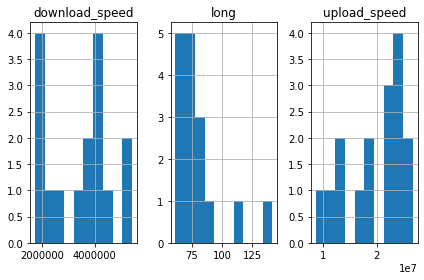

In [44]:
# univariate histogram
dataset.hist(layout=(1,3))
plt.tight_layout()
plt.show()

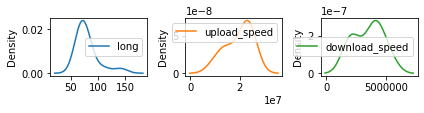

In [45]:
# univatiate density
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

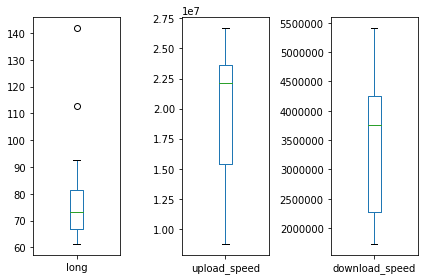

In [46]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.tight_layout()
plt.show()

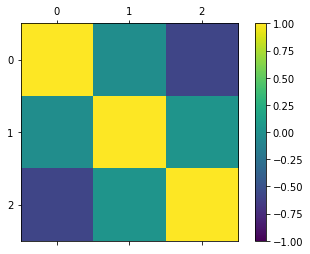

In [47]:
# generic correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

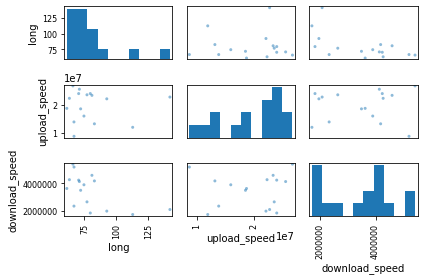

In [48]:
# scatter plot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
plt.tight_layout()
plt.show()

In [49]:
# rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

array = dataset.values

# seperate array into input and output components
X = array[:, 2:4]
y = array[:, 4]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summerize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5, :])

[[0.196 0.823]
 [0.166 0.402]
 [0.069 0.285]
 [0.122 0.934]
 [0.115 0.847]]


In [50]:
# standerdize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summerize transformed data
print(rescaledX[0:5, :])

[[-0.148  0.731]
 [-0.265 -0.71 ]
 [-0.653 -1.11 ]
 [-0.443  1.109]
 [-0.47   0.813]]


In [51]:
# normalize data
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summerize transformed data
print(normalizedX[0:5, :])

[[3.276e-06 1.000e+00]
 [4.683e-06 1.000e+00]
 [4.830e-06 1.000e+00]
 [2.788e-06 1.000e+00]
 [2.946e-06 1.000e+00]]


In [52]:
# binarization
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summerize transformed data
print(binaryX[0:5, :])

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
